## Data Investigation
***

*Procedure: install Libraries

In [14]:

# Importing the pandas library
# 
import pandas as pd

# Importing the numpy library
#
import numpy as np

## Reading the data set from our csv.
***
 
*The dataset we will use contains information about hiring electric cars.
*Data was extracted from opendataparis.com, where the Autolib availability information was
available in real-time.


In [4]:
# We will also preview the data in this step

ecars = pd.read_csv('Data/projectcars.csv', sep =',', encoding= 'utf8')
ecars.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,...,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,...,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,...,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,...,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,...,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,...,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [5]:
# Accessing our data frame info.

ecars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

## 1. Validation of our data
***
*Procedure (i): Drop Irrelevant columns

In [6]:
#  we will get rid of irrelevant columns as observed from our data description document.
# The columns to drop are address scheduled at geo point displayed comment and public name.
columns = ['Address','Geo point','Displayed comment','Public name','year','month','Scheduled at']

ecars.drop(columns, axis=1, inplace=True)

ecars.head()


,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute
0,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,nonexistent,8,11,43
1,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,operational,0,station,ok,nonexistent,6,7,24
2,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,operational,1,station,ok,nonexistent,3,20,14
3,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,operational,2,station,ok,nonexistent,4,4,37
4,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,3,station,ok,nonexistent,8,17,23


*Procedure (ii): *
*Fix spaces in columns*
,*Check Column names.*
*Fix typos.*

In [8]:
#  Removing white spaces
# df2['employee_id'] = df2['employee_id'].str.strip()
#  do for city and ID
ecars['ID'] = ecars['ID'].str.replace(" ","")
ecars.ID

0                         paris-suffren-2
1              paris-raymondlosserand-145
2       lebourget-johnfitzgeraldkennedy-2
3                   paris-eugeneoudine-51
4               paris-portedechamperret-6
                      ...                
4995                 colombes-menelotte-8
4996                     paris-dantzig-37
4997                        paris-bac-142
4998     fontenaysousbois-valdefontenay-2
4999                 paris-henrybrisson-5
Name: ID, Length: 5000, dtype: object

In [9]:
# Checkinng our column names
# No action was taken on the fix typos step since the data set is large.
# And there are no fixed values to counter check.

ecars.columns

Index(['Cars', 'Bluecar counter', 'Utilib counter', 'Utilib 1.4 counter',
       'Charge Slots', 'Charging Status', 'City', 'ID', 'Kind', 'Postal code',
       'Rental status', 'Slots', 'Station type', 'Status',
       'Subscription status', 'day', 'hour', 'minute'],
      dtype='object')

## 2. Accuracy
***

In [10]:
# Compare columns with car and bluecar
#  df['col_1'].equals(df['col_2'])
# 
ecars['Cars'].equals(ecars['Bluecar counter'])

True

In [11]:
# The data in both columns is accurate so we can drop the column.
# df.drop(columns=['B', 'C'])

ecars.drop(columns=['Cars'], axis=1,inplace=True)
ecars.columns

Index(['Bluecar counter', 'Utilib counter', 'Utilib 1.4 counter',
       'Charge Slots', 'Charging Status', 'City', 'ID', 'Kind', 'Postal code',
       'Rental status', 'Slots', 'Station type', 'Status',
       'Subscription status', 'day', 'hour', 'minute'],
      dtype='object')

In [ ]:
# In considerations to accuracy the Public name column was dropped
# Since it contains data that has poor quality and it matches with ID which has all characters present.

## 3.Completeness
***
*Check for null values

In [12]:
# We can do a quick check to see if we have any missing values at all
# It gives false as the answer hence no missing values.
print(ecars.isnull().values.any())


False


# Checking for outliers

In [17]:
# Importing the libraries

import matplotlib.pyplot as plt 
%matplotlib inline 

<AxesSubplot:title={'center':'Bluecar counter'}, xlabel='day'>

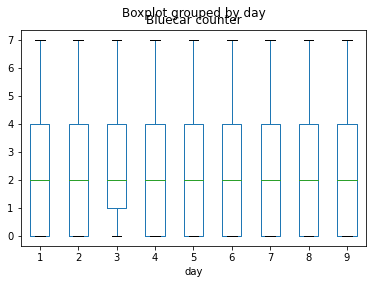

In [18]:
# It possible to identify outliers using more than one variables as shown
# ---
#  There are no outliers. Method used is boxplot.
ecars.boxplot(column =['Bluecar counter'], by ='day', grid = False)

## 4. Consistency 
***
*Check for duplicates,
*Drop if any.

In [19]:
# Check for duplicates that may affect our data.
# By setting keep on False, all duplicates are True.

ecars.duplicated(keep=False)
# No duplicates found is the conclusion.
# ecars[ecars.duplicated()]

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [20]:
#  We can also use the info function to see if all values are non-null
ecars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Bluecar counter      5000 non-null   int64 
 1   Utilib counter       5000 non-null   int64 
 2   Utilib 1.4 counter   5000 non-null   int64 
 3   Charge Slots         5000 non-null   int64 
 4   Charging Status      5000 non-null   object
 5   City                 5000 non-null   object
 6   ID                   5000 non-null   object
 7   Kind                 5000 non-null   object
 8   Postal code          5000 non-null   int64 
 9   Rental status        5000 non-null   object
 10  Slots                5000 non-null   int64 
 11  Station type         5000 non-null   object
 12  Status               5000 non-null   object
 13  Subscription status  5000 non-null   object
 14  day                  5000 non-null   int64 
 15  hour                 5000 non-null   int64 
 16  minute

## 5. Uniformity 
***
Steps:
* Renaming columns.
* Standardization.
* Filter operational stations.
* Export data to csv

In [21]:
# 1. Renaming columns
# We will rename the Id column to suit our objectives as described
# 
ecars = ecars.rename({'ID': 'Station name'}, axis='columns')
ecars.columns


Index(['Bluecar counter', 'Utilib counter', 'Utilib 1.4 counter',
       'Charge Slots', 'Charging Status', 'City', 'Station name', 'Kind',
       'Postal code', 'Rental status', 'Slots', 'Station type', 'Status',
       'Subscription status', 'day', 'hour', 'minute'],
      dtype='object')

In [22]:
# 2. Standardization - Fixing messy column names
# Sometimes you might have column names which are uppercase, with spaces, 
# and whitespace all around. How do we fix this? 
# We use the .str method that we use on text data. 
# Ideally, we chain a bunch of .str functions as shown below; 
#

# we use strip(), lower() and replace() functions
# 
ecars.columns = ecars.columns.str.lower().str.strip().str.replace(' ', '_')
ecars.head(1)

,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,station_name,kind,postal_code,rental_status,slots,station_type,status,subscription_status,day,hour,minute
0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,nonexistent,8,11,43


In [23]:
# 3. Filter Operational stations
# This is because Whether the station is operational for recharging. Mainly "nonexistent", "operational" or "broken": charge slots can only be greater than 0 when "operational"; slots and vehicles can be available in all situations (except future stations that have 0 resources)

cleaned_ecars = ecars[ecars["rental_status"].map(lambda values: "operational" in values)]
cleaned_ecars.head(10)

,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,station_name,kind,postal_code,rental_status,slots,station_type,status,subscription_status,day,hour,minute
0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,nonexistent,8,11,43
1,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,operational,0,station,ok,nonexistent,6,7,24
2,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,operational,1,station,ok,nonexistent,3,20,14
3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,operational,2,station,ok,nonexistent,4,4,37
4,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,3,station,ok,nonexistent,8,17,23
5,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,75011,operational,4,station,ok,nonexistent,6,7,2
7,3,1,0,0,nonexistent,Nanterre,nanterre-luaps-17,STATION,92000,operational,0,station,ok,nonexistent,4,22,13
8,1,0,0,0,nonexistent,Paris,paris-jeanmoulin-34,STATION,75014,operational,4,station,ok,nonexistent,2,22,58
9,6,0,0,0,nonexistent,Paris,paris-anvers-parking,PARKING,75009,operational,0,station,ok,nonexistent,4,15,2
10,0,0,0,2,operational,Paris,paris-censier-14,STATION,75005,operational,6,station,ok,nonexistent,1,4,39


In [24]:
# check final data set info
cleaned_ecars.info()
print('\n')
cleaned_ecars.size

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4618 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bluecar_counter      4618 non-null   int64 
 1   utilib_counter       4618 non-null   int64 
 2   utilib_1.4_counter   4618 non-null   int64 
 3   charge_slots         4618 non-null   int64 
 4   charging_status      4618 non-null   object
 5   city                 4618 non-null   object
 6   station_name         4618 non-null   object
 7   kind                 4618 non-null   object
 8   postal_code          4618 non-null   int64 
 9   rental_status        4618 non-null   object
 10  slots                4618 non-null   int64 
 11  station_type         4618 non-null   object
 12  status               4618 non-null   object
 13  subscription_status  4618 non-null   object
 14  day                  4618 non-null   int64 
 15  hour                 4618 non-null   int64 
 16  minute

78506

In [19]:
#  Export our data set to a final csv.

# export to finalproject

finalproject = cleaned_ecars.to_csv('finalproject.csv')

# Answering Questions using cleaned data.
***

## Research Question.
*Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018*

In [25]:
# First we upload our cleaned data set.

fecars = pd.read_csv('Data/finalproject.csv')
fecars.head()

,Unnamed: 0,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,station_name,kind,postal_code,rental_status,slots,station_type,status,subscription_status,day,hour,minute
0,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,nonexistent,8,11,43
1,1,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,operational,0,station,ok,nonexistent,6,7,24
2,2,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,operational,1,station,ok,nonexistent,3,20,14
3,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,operational,2,station,ok,nonexistent,4,4,37
4,4,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,3,station,ok,nonexistent,8,17,23


In [26]:
# Checking info incase of any changes and there were, so we can drop the unnamed columnn.
fecars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4618 entries, 0 to 4617
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           4618 non-null   int64 
 1   bluecar_counter      4618 non-null   int64 
 2   utilib_counter       4618 non-null   int64 
 3   utilib_1.4_counter   4618 non-null   int64 
 4   charge_slots         4618 non-null   int64 
 5   charging_status      4618 non-null   object
 6   city                 4618 non-null   object
 7   station_name         4618 non-null   object
 8   kind                 4618 non-null   object
 9   postal_code          4618 non-null   int64 
 10  rental_status        4618 non-null   object
 11  slots                4618 non-null   int64 
 12  station_type         4618 non-null   object
 13  status               4618 non-null   object
 14  subscription_status  4618 non-null   object
 15  day                  4618 non-null   int64 
 16  hour  

In [27]:
fecars.drop(['Unnamed: 0'], axis=1, inplace=True)
fecars.columns

Index(['bluecar_counter', 'utilib_counter', 'utilib_1.4_counter',
       'charge_slots', 'charging_status', 'city', 'station_name', 'kind',
       'postal_code', 'rental_status', 'slots', 'station_type', 'status',
       'subscription_status', 'day', 'hour', 'minute'],
      dtype='object')

In [28]:
# The question requires we get the city of paris.
# Data points like year and month are ignored since we are looking at a dataset from the same month same year.
#  In a span of 9 days.columns

pariscars = fecars[fecars["city"].map(lambda values: "Paris" in values)]
pariscars.head(15)

,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,station_name,kind,postal_code,rental_status,slots,station_type,status,subscription_status,day,hour,minute
0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,nonexistent,8,11,43
1,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,operational,0,station,ok,nonexistent,6,7,24
3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,operational,2,station,ok,nonexistent,4,4,37
4,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,3,station,ok,nonexistent,8,17,23
5,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,75011,operational,4,station,ok,nonexistent,6,7,2
7,1,0,0,0,nonexistent,Paris,paris-jeanmoulin-34,STATION,75014,operational,4,station,ok,nonexistent,2,22,58
8,6,0,0,0,nonexistent,Paris,paris-anvers-parking,PARKING,75009,operational,0,station,ok,nonexistent,4,15,2
9,0,0,0,2,operational,Paris,paris-censier-14,STATION,75005,operational,6,station,ok,nonexistent,1,4,39
11,5,1,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,0,station,ok,nonexistent,5,12,22
12,0,0,0,0,nonexistent,Paris,paris-jeanmoulin-34,STATION,75014,operational,0,station,ok,nonexistent,8,21,54


In [29]:
# The data needs to be grouped by station name and day
# 
columns= ['station_name', 'hour', 'day']
filt_paris = pariscars.groupby(['station_name','day', 'hour']).sum().reset_index()
filt_paris.head(10)

,station_name,day,hour,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,minute
0,paris-25aout1944-8,1,18,1,0,0,0,75014,2,40
1,paris-25aout1944-8,2,7,4,0,0,0,75014,0,37
2,paris-25aout1944-8,2,12,2,0,0,0,75014,1,49
3,paris-25aout1944-8,4,3,3,0,0,0,75014,0,10
4,paris-25aout1944-8,4,18,1,0,0,0,75014,1,48
5,paris-25aout1944-8,7,21,1,0,1,0,75014,1,18
6,paris-25aout1944-8,9,5,0,0,0,0,75014,3,23
7,paris-25aout1944-8,9,20,1,0,1,0,75014,1,53
8,paris-adolphemax-6,2,11,4,0,0,0,75009,0,1
9,paris-adolphemax-6,7,16,0,0,0,0,75009,3,47


In [30]:
# The data did not contain any column with rented or returned cars so we have to formulate a counter.
# diff() function calculates the difference of a DataFrame element compared with another 
#  +ve values mean returned -ve means picked

filt_paris['hire_rates'] = filt_paris.groupby('station_name')['bluecar_counter'].diff().fillna(0)
filt_paris.head(20)

,station_name,day,hour,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,minute,hire_rates
0,paris-25aout1944-8,1,18,1,0,0,0,75014,2,40,0.0
1,paris-25aout1944-8,2,7,4,0,0,0,75014,0,37,3.0
2,paris-25aout1944-8,2,12,2,0,0,0,75014,1,49,-2.0
3,paris-25aout1944-8,4,3,3,0,0,0,75014,0,10,1.0
4,paris-25aout1944-8,4,18,1,0,0,0,75014,1,48,-2.0
5,paris-25aout1944-8,7,21,1,0,1,0,75014,1,18,0.0
6,paris-25aout1944-8,9,5,0,0,0,0,75014,3,23,-1.0
7,paris-25aout1944-8,9,20,1,0,1,0,75014,1,53,1.0
8,paris-adolphemax-6,2,11,4,0,0,0,75009,0,1,0.0
9,paris-adolphemax-6,7,16,0,0,0,0,75009,3,47,-4.0


In [31]:
#obtain -ve values meaning a car was picked


hiredp = filt_paris[filt_paris['hire_rates'] < 0]
hiredp.head()

,station_name,day,hour,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,minute,hire_rates
2,paris-25aout1944-8,2,12,2,0,0,0,75014,1,49,-2.0
4,paris-25aout1944-8,4,18,1,0,0,0,75014,1,48,-2.0
6,paris-25aout1944-8,9,5,0,0,0,0,75014,3,23,-1.0
9,paris-adolphemax-6,7,16,0,0,0,0,75009,3,47,-4.0
14,paris-adolphemille-8,4,18,2,0,1,0,75019,1,23,-2.0


In [32]:
# Find the hour with highest frquency in regards to Paris only.
# largest negative value means had high rates of picking
hiredp['hire_rates'].sum()
hiredp.groupby(['hour'])['hire_rates'].sum().sort_values().head(1)

hour
21   -112.0
Name: hire_rates, dtype: float64

## Qestion 2.
***
*What is the most popular hour for returning cars?*

In [33]:
# Here we get to filter our data frame to obtain returned cars.
# Here we are looking for positive values in the hire rate.

return_ecar = fecars.groupby(['station_name','day','hour']).sum().reset_index()
return_ecar.head()



,station_name,day,hour,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,minute
0,alfortville-charlesdegaulle-16,1,0,2,0,0,0,94140,0,36
1,alfortville-charlesdegaulle-16,1,1,4,0,0,0,94140,0,36
2,alfortville-charlesdegaulle-16,3,4,3,0,0,0,94140,3,3
3,alfortville-charlesdegaulle-16,3,22,4,0,0,0,94140,1,27
4,alfortville-charlesdegaulle-16,4,3,6,0,0,0,94140,0,30


In [34]:
#  +ve values mean returned
# adding the hire rate column.
return_ecar['hire_rates'] = return_ecar.groupby('station_name')['bluecar_counter'].diff().fillna(0)
return_ecar.head()

,station_name,day,hour,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,minute,hire_rates
0,alfortville-charlesdegaulle-16,1,0,2,0,0,0,94140,0,36,0.0
1,alfortville-charlesdegaulle-16,1,1,4,0,0,0,94140,0,36,2.0
2,alfortville-charlesdegaulle-16,3,4,3,0,0,0,94140,3,3,-1.0
3,alfortville-charlesdegaulle-16,3,22,4,0,0,0,94140,1,27,1.0
4,alfortville-charlesdegaulle-16,4,3,6,0,0,0,94140,0,30,2.0


In [35]:
# Filter out our returned cars.

#  separate +ve to get returned
return_ecar = return_ecar[return_ecar['hire_rates'] > 0]
return_ecar.head()

,station_name,day,hour,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,minute,hire_rates
1,alfortville-charlesdegaulle-16,1,1,4,0,0,0,94140,0,36,2.0
3,alfortville-charlesdegaulle-16,3,22,4,0,0,0,94140,1,27,1.0
4,alfortville-charlesdegaulle-16,4,3,6,0,0,0,94140,0,30,2.0
6,alfortville-etiennedolet-174,6,7,4,0,0,0,94140,2,52,3.0
10,alfortville-jeanbaptistepreux-17,7,8,4,0,0,0,94140,2,15,3.0


In [36]:
# Getting the most popular return hour.ecars

return_ecar['hire_rates'].sum()
return_ecar.groupby(['hour'])['hire_rates'].sum().sort_values().head(1)

hour
15    87.0
Name: hire_rates, dtype: float64

## Question 3
*What station is the most popular?
Overall?
At the most popular picking hour?*


In [37]:
# Since the earlier picking hour was for Paris only. 
# We have to get popular picking hour for the overall data set.

gen_ecars = fecars.groupby(['station_name','day','hour']).sum().reset_index()
gen_ecars.head()

,station_name,day,hour,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,minute
0,alfortville-charlesdegaulle-16,1,0,2,0,0,0,94140,0,36
1,alfortville-charlesdegaulle-16,1,1,4,0,0,0,94140,0,36
2,alfortville-charlesdegaulle-16,3,4,3,0,0,0,94140,3,3
3,alfortville-charlesdegaulle-16,3,22,4,0,0,0,94140,1,27
4,alfortville-charlesdegaulle-16,4,3,6,0,0,0,94140,0,30


In [38]:
# Getting the hire rates.

#  Positive values mean returned and negative means picked

gen_ecars['hire_rates'] = gen_ecars.groupby('station_name')['bluecar_counter'].diff().fillna(0)
gen_ecars.head()

,station_name,day,hour,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,minute,hire_rates
0,alfortville-charlesdegaulle-16,1,0,2,0,0,0,94140,0,36,0.0
1,alfortville-charlesdegaulle-16,1,1,4,0,0,0,94140,0,36,2.0
2,alfortville-charlesdegaulle-16,3,4,3,0,0,0,94140,3,3,-1.0
3,alfortville-charlesdegaulle-16,3,22,4,0,0,0,94140,1,27,1.0
4,alfortville-charlesdegaulle-16,4,3,6,0,0,0,94140,0,30,2.0


In [39]:
# First we get the most popular station overall.
# 
gen_ecars.groupby(['station_name'])['hire_rates'].sum().sort_values().head()

# Note that number with highest value whether postitive or negative means it is the most  popular.
# In considerations to ignoring 0 values since they show no activity transipired.


station_name
bagneux-leonblum-13      -8.0
montreuil-vincennes-11   -7.0
paris-courcelles-210     -6.0
paris-beaugrenelle-4     -6.0
paris-bercy-88           -6.0
Name: hire_rates, dtype: float64

In [40]:
#  Then we filter out our data set to get picked cars
#  Filter out negative values.

gen_ecars_picked = gen_ecars[gen_ecars['hire_rates'] < 0]
gen_ecars_picked.head()

,station_name,day,hour,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,minute,hire_rates
2,alfortville-charlesdegaulle-16,3,4,3,0,0,0,94140,3,3,-1.0
8,alfortville-jeanbaptistepreux-17,2,23,2,1,0,0,94140,3,47,-4.0
9,alfortville-jeanbaptistepreux-17,4,20,1,0,0,0,94140,4,19,-1.0
13,alfortville-josephfranceschi-1,3,20,3,0,0,0,94140,2,54,-2.0
14,alfortville-josephfranceschi-1,4,11,0,0,0,0,94140,5,48,-3.0


In [41]:
# Now we can get most popular hour for picking cars.
# Popular hour for picking cars is 21:00hrs
gen_ecars_picked['hire_rates'].sum()
gen_ecars_picked.groupby(['hour'])['hire_rates'].sum().sort_values().head(1)

hour
21   -197.0
Name: hire_rates, dtype: float64

In [42]:
# Finfing most popular station at that hour.
# filtering the data to get 21.
pophr_21 = gen_ecars_picked[gen_ecars_picked["hour"] ==  21]
pophr_21.head()


,station_name,day,hour,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,minute,hire_rates
303,bourglareine-andretheuriet-1,9,21,2,0,0,0,92340,4,48,-2.0
318,cachan-pontroyal-24,6,21,2,0,0,0,94230,3,1,-2.0
321,cachan-saussaies-36,3,21,2,0,0,0,94230,4,0,-1.0
399,chatillon-verdun-76,2,21,2,0,0,0,92320,3,12,-3.0
447,clamart-portedetrivaux-130,5,21,5,0,0,0,92140,1,49,-1.0


In [43]:
# Finding the station
# 
pophr_21.groupby(['station_name'])['hire_rates'].sum().sort_values().head(1)

station_name
paris-hopital-47   -6.0
Name: hire_rates, dtype: float64

## Question 4.
*What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
Overall?
At the most popular picking hour?*


In [44]:
# Popular postal code for picking up blue cars?
# Overall
gen_ecars_picked.groupby(['postal_code'])['hire_rates'].sum().sort_values().head(1)

postal_code
75015   -176.0
Name: hire_rates, dtype: float64

In [45]:
# Does it match with the most popular station at picking hr?
# No it does not.

gen_ecars_picked.loc[gen_ecars['station_name'] == 'paris-hopital-47'].head()

,station_name,day,hour,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,minute,hire_rates
2520,paris-hopital-47,3,21,0,0,0,0,75013,4,13,-3.0
2523,paris-hopital-47,8,10,3,0,1,0,75013,0,27,-2.0
2524,paris-hopital-47,8,21,0,0,0,0,75013,3,48,-3.0


In [46]:
# Popular postal code at popular picking hr.
# 
pophr_21.groupby(['postal_code'])['hire_rates'].sum().sort_values().head(1)

postal_code
75013   -17.0
Name: hire_rates, dtype: float64

In [47]:
# Does it match with the most popular station at picking hr?
# Yes,it does.

gen_ecars_picked.loc[gen_ecars_picked['station_name'] == 'paris-hopital-47'].head()

,station_name,day,hour,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,minute,hire_rates
2520,paris-hopital-47,3,21,0,0,0,0,75013,4,13,-3.0
2523,paris-hopital-47,8,10,3,0,1,0,75013,0,27,-2.0
2524,paris-hopital-47,8,21,0,0,0,0,75013,3,48,-3.0
